# Intégration numérique

Pour le réaliser sans installation, depuis un navigateur :
<a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_integration.ipynb"> ça se passe ici<a>

On peut distinguer deux cas d'intégration : le cas où la fonction analytique est connue (par exemple l'énergie spectrale du spectre solaire) et celui - le plus courant - où elle est inconnue, par exemple lorsqu'on souhaite intégrer des mesures.



## Intégration d'une fonction analytique
    
Le calcul de l'énergie $E = \int P.dt$ peut se faire numériquement (ouf). Pour cela il y a diverses méthodes d'intégration (<a href="https://fr.wikipedia.org/wiki/Calcul_num%C3%A9rique_d%27une_int%C3%A9grale">un rappel<a>).
    
Prenons l'exemple de la fonction $f(x)=x$ décrit ci-dessous.

In [2]:
# l'import de la librairie qui fait ce genre de choses
import scipy.integrate as integrate

# on définit la fonction à intégrer
def fc_interp(x):
    return x

E = integrate.quad(lambda x: fc_interp(x), 0, 1)[0]
print("et l'intégrale de y=x entre 0 et 1 vaut...", E)

et l'intégrale de y=x entre 0 et 1 vaut... 0.5


<span style="color:green"> *À vous de jouer : calculez l'intégrale de $f(x)=x^3 +2$ entre $0$ et $1$ puis vérifiez la valeur analytiquement.* </span>

In [3]:
import scipy.integrate as integrate

# on définit la fonction à intégrer
def fc_interp(x):
    return x**3+2

E = integrate.quad(lambda x: fc_interp(x), 0, 1)[0]
print("et l'intégrale de x**3+2 entre 0 et 1 vaut...", E)


et l'intégrale de x**3+2 entre 0 et 1 vaut... 2.25




```
# Ce texte est au format code
```

<span style="color:green"> *Bonus : calculez l'énergie contenue dans le spectre solaire (<a href="https://eddes.github.io/#numerical-integration">une piste<a>).* </span>

## Intégration de mesures

Il est évidemment plus courant de travailler avec des points mesurés, et non avec des fonctions analytiques connues comme ci-avant. Afin de pouvoir utiliser la procédure vue ci-dessus, l'astuce consiste à créer une fonction qui interpole à partir des données (ce sera une interpolation linéaire).

### Faire une fonction d'interpolation

Prenons un exemple très simple pour nous mettre dans le bain :

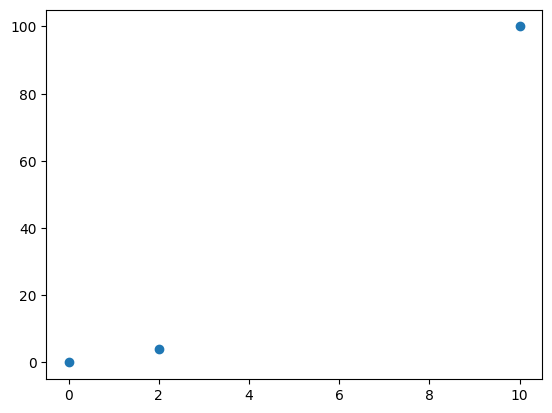

In [5]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# les donnees mesurees
temps = [0, 2, 10] # en heures
puissance = [0, 4, 100] # en Watts
plt.plot(temps,puissance, 'o', label='mesure')

import scipy.interpolate # package d'interpolation

# creation fc d'interpolation a partir des donnees
fc_interp = scipy.interpolate.interp1d(temps, puissance)

Ensuite on vérifie que notre interpolation est bonne et on integre avec le package scipy

L'energie vaut...  (371.4999993958044, 1.4465165349974995e-06)  [Wh]


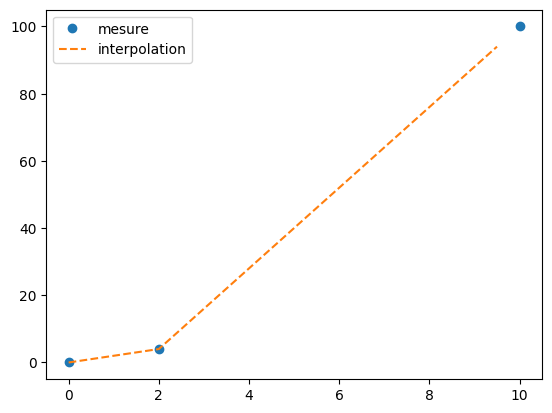

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#dessus
from scipy.interpolate import interp1d
# les donnees mesurees
temps = [0, 2, 10] # en heures
puissance = [0, 4, 100] # en Watts
plt.plot(temps,puissance, 'o', label='mesure')

import scipy.interpolate # package d'interpolation

# creation fc d'interpolation a partir des donnees
fc_interp = scipy.interpolate.interp1d(temps, puissance)

#dessus

temps_regulier = np.arange(0,10,0.5)
p_regulier=fc_interp(temps_regulier)

#plt.plot(x,y,'o', label='mesure')
plt.plot(temps_regulier ,p_regulier, '--', label='interpolation')
plt.legend()

#... et on integre
import scipy.integrate as integrate
energie = integrate.quad(lambda temps_regulier : fc_interp(temps_regulier), min(temps_regulier ), max(temps_regulier))
print("L'energie vaut... ", energie, " [Wh]")



> Ajouter une citation


### Application sur données rélles

Dans le cas présent, les données mesurées sont un débit d'eau sur un réseau de chaleur en m3/h avec les températures et le temps (<a href="https://github.com/eddes/INSA/blob/main/Techniques_numeriques/debit_dt.csv">c'est ici<a>).

On appliquera donc la formule $P = \rho Q_v C_p (T_c - T_f) $ pour calculer la puissance, avec $C_p=4200$ [J/kg/K] et $\rho=1000$ [kg/m$^3$]. Ensuite il va falloir intégrer !

In [1]:
import scipy.interpolate # package d'interpolation
# les donnees mesurees
#temps = ...
#puissance = ...
# creation fc d'interpolation a partir des donnees
fc_interp = scipy.interpolate.interp1d(x, y)


# mon code


import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
import pandas as pd
import scipy.integrate as integrate

# Lire les données CSV
df = pd.read_csv("debit_dt.csv", usecols=["Timestamp", "Debit [m3/h]", "T aller", "T retour"])

# Définition des constantes physiques
ro = 1000
Cp = 4200

# Calcul de la puissance
df["Puissance (W)"] = ro * Cp * (df["Debit [m3/h]"]) * (df["T aller"] - df["T retour"])

# Extraction des valeurs de temps et de puissance
temps = df["Timestamp"].values
puissance = df["Puissance (W)"].values

# Affichage des données mesurées
plt.plot(temps, puissance, 'o', label='Mesures')
plt.xlabel("Temps (secondes)")
plt.ylabel("Puissance (W)")
plt.legend()
plt.show()

# Création de la fonction d'interpolation
fc_interp = scipy.interpolate.interp1d(temps, puissance)

# Création du temps régulier avec 100 points
temps_regulier = np.linspace(df["Timestamp"].min(), df["Timestamp"].max())
p_regulier = fc_interp(temps_regulier)

# Affichage de l'interpolation
plt.plot(temps, puissance, 'o', label='Mesures')
plt.plot(temps_regulier, p_regulier, '--', label='Interpolation')
plt.xlabel("Temps (secondes)")
plt.ylabel("Puissance (W)")
plt.legend()
plt.show()

#... et on integre
import scipy.integrate as integrate
energie = integrate.quad(lambda temps_regulier : fc_interp(temps_regulier), min(temps_regulier ), max(temps_regulier))
print("L'energie vaut... ", energie, " [Wh]")

FileNotFoundError: [Errno 2] No such file or directory: 'debit_dt.csv'